<a href="https://colab.research.google.com/github/mariapiachiatante/DSE_SAOP_Project/blob/main/SAOP_Project_DSE_MP_Chiatante_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sentiment Analysis and Opinion Mining Project: Public opinion on news

In [ ]:
from google.colab import files
files.upload() #uploading the json file with my personal Kaggle API tokens

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"maryperry21","key":"38a8106ef3fb5404644665cfa2f28268"}'}

In [ ]:
#Download the dataset
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d aashita/nyt-comments

kaggle.json
nyt-comments.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#Unzip the files
!unzip /content/nyt-comments.zip

Archive:  /content/nyt-comments.zip
replace ArticlesApril2017.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import glob
articles = glob.glob('/content/Articles*.csv') #import all the csv files that represent articles

In [ ]:
import pandas as pd
articles_list = []

for article in articles:
    df = pd.read_csv(article, index_col=None, header=0)
    articles_list.append(df)

articles = pd.concat(articles_list, axis=0, ignore_index=True) #store all the articles in one unique dataframe

In [ ]:
type(articles)

pandas.core.frame.DataFrame

##Exploratory Analysis

In [ ]:
articles.shape

(9335, 16)

In [ ]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9335 entries, 0 to 9334
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   articleID         9335 non-null   object
 1   byline            9335 non-null   object
 2   documentType      9335 non-null   object
 3   headline          9335 non-null   object
 4   keywords          9335 non-null   object
 5   multimedia        9335 non-null   int64 
 6   newDesk           9335 non-null   object
 7   printPage         9335 non-null   int64 
 8   pubDate           9335 non-null   object
 9   sectionName       9335 non-null   object
 10  snippet           9335 non-null   object
 11  source            9335 non-null   object
 12  typeOfMaterial    9335 non-null   object
 13  webURL            9335 non-null   object
 14  articleWordCount  9335 non-null   int64 
 15  abstract          167 non-null    object
dtypes: int64(3), object(13)
memory usage: 1.1+ MB


In [ ]:
articles.head()

,articleID,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL,articleWordCount,abstract
0,5a974697410cf7000162e8a4,By BINYAMIN APPELBAUM,article,"Virtual Coins, Real Resources","['Bitcoin (Currency)', 'Electric Light and Pow...",1,Business,1,2018-03-01 00:17:22,Economy,America has a productivity problem. One explan...,The New York Times,News,https://www.nytimes.com/2018/02/28/business/ec...,1207,NaN
1,5a974be7410cf7000162e8af,By HELENE COOPER and ERIC SCHMITT,article,U.S. Advances Military Plans for North Korea,"['United States Defense and Military Forces', ...",1,Washington,11,2018-03-01 00:40:01,Asia Pacific,The American military is looking at everything...,The New York Times,News,https://www.nytimes.com/2018/02/28/world/asia/...,1215,NaN
2,5a9752a2410cf7000162e8ba,By THE EDITORIAL BOARD,article,Mr. Trump and the ‘Very Bad Judge’,"['Trump, Donald J', 'Curiel, Gonzalo P', 'Unit...",1,Editorial,26,2018-03-01 01:08:46,Unknown,Can you guess which man is the model public se...,The New York Times,Editorial,https://www.nytimes.com/2018/02/28/opinion/tru...,1043,NaN
3,5a975310410cf7000162e8bd,By JAVIER C. HERNÁNDEZ,article,"To Erase Dissent, China Bans Pooh Bear and ‘N’","['China', 'Xi Jinping', 'Term Limits (Politica...",1,Foreign,1,2018-03-01 01:10:35,Asia Pacific,Censors swung into action after Mr. Xi’s bid t...,The New York Times,News,https://www.nytimes.com/2018/02/28/world/asia/...,1315,NaN
4,5a975406410cf7000162e8c3,"By JESSE DRUCKER, KATE KELLY and BEN PROTESS",article,Loans Flowed to Kushner Cos. After Visits to t...,"['Kushner, Jared', 'Kushner Cos', 'United Stat...",1,Business,1,2018-03-01 01:14:41,Unknown,"Apollo, the private equity firm, and Citigroup...",The New York Times,News,https://www.nytimes.com/2018/02/28/business/ja...,1566,NaN


In [ ]:
#Summary statistics of the numerical variables 
articles.describe() 

,multimedia,printPage,articleWordCount
count,9335.000000,9335.000000,9335.000000
mean,25.257633,6.855597,1103.619711
std,31.293703,10.370867,831.760871
min,0.000000,0.000000,11.000000
25%,1.000000,0.000000,725.000000
50%,3.000000,1.000000,1000.000000
75%,67.000000,11.000000,1316.500000
max,68.000000,198.000000,16336.000000


In [ ]:
#Distinct document types
print(articles['documentType'].nunique()) 
print(articles['documentType'].unique())

2
['article' 'blogpost']


In [ ]:
#Distinct topics
print(articles['newDesk'].nunique()) 
print(articles['newDesk'].unique())

44
['Sports' 'Climate' 'Dining' 'Washington' 'Foreign' 'NYTNow' 'Express'
 'Insider' 'Learning' 'Magazine' 'Metro' 'RealEstate' 'Business'
 'Politics' 'National' 'SpecialSections' 'BookReview' 'Well' 'Games'
 'Culture' 'Editorial' 'OpEd' 'Arts&Leisure' 'Science' 'Travel' 'Upshot'
 'Metropolitan' 'Investigative' 'NewsDesk' 'Weekend' 'SundayBusiness'
 'Styles' 'Photo' 'Obits' 'Smarter Living' 'Society' 'Podcasts' 'Summary'
 'TStyle' 'Unknown' 'EdLife' 'Letters' 'Automobiles' 'Video']


In [ ]:
#Distinct sections
print(articles['sectionName'].nunique()) 
print(articles['sectionName'].unique())

62
['Pro Football' 'Unknown' 'Europe' 'Canada' 'Politics' 'Book Review' 'Eat'
 'DealBook' 'Asia Pacific' 'Wine, Beer & Cocktails' 'Family' 'Hockey'
 'Africa' 'Television' 'Economy' 'Middle East' 'Tennis' 'Sunday Review'
 'Live' 'The Daily' 'Move' 'Cycling' 'Americas' 'Australia' 'Mind'
 'Weddings' 'Art & Design' 'Lesson Plans' 'Personal Tech' 'Music'
 'Pro Basketball' 'Learning' 'Media' 'Golf' 'College Basketball' 'Soccer'
 'Baseball' 'College Football' 'Room For Debate' 'Education Life'
 'Student Loans' 'Auto Racing' 'Cricket' 'Energy & Environment '
 'Olympics' 'Retirement' "401(k)'s and Similar Plans" 'Opinion | Politics'
 'Automobiles' 'Food' 'Dance' 'Art' 'Opinion | The World' 'Editorials'
 'Fashion & Beauty' 'Entrepreneurship' 'Entertainment' 'Real Estate'
 'Neighborhoods' 'Rugby' 'Paying for College' 'Insider Events']


In [ ]:
#Distinct sources
print(articles['source'].nunique()) 
print(articles['source'].unique())

2
['The New York Times' 'International New York Times']


In [ ]:
#Distinct material types
print(articles['typeOfMaterial'].nunique()) 
print(articles['typeOfMaterial'].unique())

14
['News' 'Editorial' 'Review' 'Op-Ed' 'briefing' 'Obituary (Obit)'
 'News Analysis' 'Question' 'Blog' 'Brief' 'Letter' 'Biography'
 'An Appraisal' 'Interview']


In [ ]:
import glob
comments = glob.glob('/content/Comments*.csv') #import all the csv files that represent comments

In [ ]:
import pandas as pd
comments_list = []

for comment in comments:
    df2 = pd.read_csv(comment, index_col=None, header=0, low_memory=False)
    comments_list.append(df2)

comments = pd.concat(comments_list, axis=0, ignore_index=True) #store all the comments in one unique dataframe

In [ ]:
type(comments)

pandas.core.frame.DataFrame

In [ ]:
comments.shape

(2176364, 34)

In [ ]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176364 entries, 0 to 2176363
Data columns (total 34 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   approveDate            int64  
 1   articleID              object 
 2   articleWordCount       float64
 3   commentBody            object 
 4   commentID              float64
 5   commentSequence        float64
 6   commentTitle           object 
 7   commentType            object 
 8   createDate             float64
 9   depth                  float64
 10  editorsSelection       int64  
 11  inReplyTo              float64
 12  newDesk                object 
 13  parentID               float64
 14  parentUserDisplayName  object 
 15  permID                 object 
 16  picURL                 object 
 17  printPage              float64
 18  recommendations        float64
 19  recommendedFlag        float64
 20  replyCount             float64
 21  reportAbuseFlag        float64
 22  sectionName       

In [ ]:
comments.head()

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,editorsSelection,inReplyTo,newDesk,parentID,parentUserDisplayName,permID,picURL,printPage,recommendations,recommendedFlag,replyCount,reportAbuseFlag,sectionName,sharing,status,timespeople,trusted,updateDate,userDisplayName,userID,userLocation,userTitle,userURL,typeOfMaterial
0,1486065741,58927e0495d0e0392607e1b3,1129.0,ANY anti Trump propaganda from Gaga and my TV ...,21332974.0,21332974.0,<br/>,comment,1.486012e+09,1.0,0,0.0,Sports,0.0,NaN,21332974,https://graphics8.nytimes.com/images/apps/time...,12.0,0.0,NaN,0.0,NaN,Pro Football,0,approved,1.0,0.0,1486065741,vilonia,68372461.0,"conway, ar",NaN,NaN,News
1,1486055271,58927e0495d0e0392607e1b3,1129.0,"I'll not watch the SB, nor the grammys or osca...",21332861.0,21332861.0,<br/>,comment,1.486011e+09,1.0,0,0.0,Sports,0.0,NaN,21332861,https://graphics8.nytimes.com/images/apps/time...,12.0,0.0,NaN,0.0,NaN,Pro Football,0,approved,1.0,0.0,1486055271,Joe Schultz,73635333.0,"Hays, KS",NaN,NaN,News
2,1486055240,58927e0495d0e0392607e1b3,1129.0,"NFL's going to do another ""in-your-face, Ameri...",21332686.0,21332686.0,NaN,comment,1.486009e+09,1.0,0,0.0,Sports,0.0,NaN,21332686,https://graphics8.nytimes.com/images/apps/time...,12.0,0.0,NaN,0.0,NaN,Pro Football,0,approved,1.0,0.0,1486055240,WilliamPenn2,61340508.0,Tacony,NaN,NaN,News
3,1486055221,58927e0495d0e0392607e1b3,1129.0,I'm continually amazed at the ill-placed crede...,21332622.0,21332622.0,<br/>,comment,1.486008e+09,1.0,0,0.0,Sports,0.0,NaN,21332622,https://graphics8.nytimes.com/images/apps/time...,12.0,0.0,NaN,0.0,NaN,Pro Football,0,approved,1.0,0.0,1486055221,Jeff Palmer,72632699.0,"Shiloh, IL",NaN,NaN,News
4,1486055214,58927e0495d0e0392607e1b3,1129.0,"Personally, I do not want to see any politics ...",21332516.0,21332516.0,<br/>,comment,1.486007e+09,1.0,0,0.0,Sports,0.0,NaN,21332516,https://graphics8.nytimes.com/images/apps/time...,12.0,0.0,NaN,0.0,NaN,Pro Football,0,approved,1.0,0.0,1486055214,Matt1234,60683284.0,Seattle,NaN,NaN,News


In [ ]:
comments.describe().apply(lambda s: s.apply('{0:.5f}'.format)) #we use a lambda function in order to suppress scientific notation

,approveDate,commentID,commentSequence,createDate,depth,editorsSelection,parentID,recommendations,recommendedFlag,replyCount,reportAbuseFlag,sharing,timespeople,trusted,updateDate,userID,inReplyTo,articleWordCount,printPage
count,2176364.00000,2176364.00000,2176364.00000,2176364.00000,2176364.00000,2176364.00000,2176364.00000,2176364.00000,0.00000,2176364.00000,0.00000,2176364.00000,2176364.00000,2176364.00000,2176364.00000,2176364.00000,2176364.00000,2176364.00000,2176364.00000
mean,1503045125.04389,23731277.65568,23731276.49607,1503034627.86571,1.27058,0.01910,6343972.11885,19.73701,nan,0.43500,nan,0.08533,0.96421,0.03461,1503046437.45699,50019049.49143,6343939.97459,1265.96201,9.09980
std,15325466.39195,2200550.32123,2200548.90590,15325980.26913,0.45293,0.13688,10578298.72308,105.21034,nan,2.26007,nan,0.27937,0.18576,0.18280,15324948.10269,23445285.63986,10578282.31876,879.44458,10.79504
min,1483318267.00000,20963706.00000,20963706.00000,1483314066.00000,1.00000,0.00000,0.00000,0.00000,nan,-128.00000,nan,0.00000,0.00000,0.00000,1483318267.00000,1045.00000,0.00000,11.00000,0.00000
25%,1489168797.75000,21762212.75000,21762212.75000,1489163748.75000,1.00000,0.00000,0.00000,1.00000,nan,0.00000,nan,0.00000,1.00000,0.00000,1489170348.00000,32716950.00000,0.00000,834.00000,1.00000
50%,1494796919.50000,22498319.50000,22498319.50000,1494789169.50000,1.00000,0.00000,0.00000,4.00000,nan,0.00000,nan,0.00000,1.00000,0.00000,1494799007.00000,57519925.00000,0.00000,1122.00000,1.00000
75%,1519525310.00000,26104094.50000,26104094.50000,1519512167.50000,2.00000,0.00000,21200338.00000,10.00000,nan,0.00000,nan,0.00000,1.00000,0.00000,1519525975.75000,67803200.00000,21200322.00000,1432.00000,19.00000
max,1525233035.00000,26941258.00000,26941258.00000,1525233032.00000,5.00000,1.00000,26940992.00000,10472.00000,nan,668.00000,nan,1.00000,1.00000,1.00000,1525233035.00000,85856312.00000,26940992.00000,16336.00000,198.00000


In [ ]:
#Distinct comment types
print(comments['commentType'].nunique()) 
print(comments['commentType'].unique())

3
['comment' 'userReply' 'reporterReply']


In [ ]:
#Distinct topics
print(comments['newDesk'].nunique()) 
print(comments['newDesk'].unique())

44
['Travel' 'Washington' 'Metro' 'Editorial' 'OpEd' 'Foreign' 'Sports'
 'BookReview' 'Culture' 'Business' 'Dining' 'Well' 'National' 'Podcasts'
 'Upshot' 'RealEstate' 'Magazine' 'Styles' 'Learning' 'Smarter Living'
 'Games' 'Science' 'Climate' 'NewsDesk' 'Unknown' 'Obits' 'SundayBusiness'
 'Insider' 'Arts&Leisure' 'Weekend' 'Express' 'Metropolitan' 'Video'
 'Letters' 'TStyle' 'SpecialSections' 'Automobiles' 'Society' 'EdLife'
 'Summary' 'Politics' 'NYTNow' 'Investigative' 'Photo']


In [ ]:
#Distinct sections
print(comments['sectionName'].nunique()) 
print(comments['sectionName'].unique())

63
['Unknown' 'Politics' 'Editorials' 'Africa' 'Book Review' 'Eat' 'Europe'
 'Pro Football' 'The Daily' 'Television' 'Middle East' 'Baseball' 'Family'
 'Asia Pacific' 'Art & Design' 'Energy & Environment ' 'Music'
 'Pro Basketball' 'Sunday Review' 'Wine, Beer & Cocktails' 'Lesson Plans'
 'Live' 'Olympics' 'Americas' 'Personal Tech' 'Move' 'DealBook' 'Media'
 'Economy' 'Fashion & Beauty' 'Tennis' 'Canada' 'Soccer' 'Dance' 'Mind'
 'World Cup' 'Australia' 'Cricket' 'Hockey' 'Weddings' 'Golf'
 'College Basketball' 'Education Life' 'Student Loans' 'Auto Racing'
 'College Football' 'Room For Debate' 'Cycling' 'Learning'
 'Entrepreneurship' 'Entertainment' 'Opinion | Politics' 'Real Estate'
 'Retirement' 'Neighborhoods' "401(k)'s and Similar Plans" 'Rugby'
 'Paying for College' 'Insider Events' nan 'Automobiles' 'Food' 'Art'
 'Opinion | The World']


In [ ]:
#Distinct statuses
print(comments['status'].nunique()) 
print(comments['status'].unique())

1
['approved']


In [ ]:
#Distinct material types
print(comments['typeOfMaterial'].nunique()) 
print(comments['typeOfMaterial'].unique())

14
['News' 'Editorial' 'Op-Ed' 'Review' 'briefing' 'Blog' 'Obituary (Obit)'
 'News Analysis' 'Letter' 'Interview' 'Question' 'Brief' 'Biography'
 'An Appraisal']


In [ ]:
#Distinct material types
print(comments['userLocation'].nunique()) 
print(comments['userLocation'].unique())

46968
['Wilmington, NC' 'San Francisco' 'Chicago' ... 'Deerhorn Valley, CA'
 'Port Isaac, Cornwall' 'here there everywhere']


In [ ]:
comments['editorsSelection'].value_counts()

0    1555406
1      40354
Name: editorsSelection, dtype: int64

In [ ]:
#Import necessary packages
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
#Identification of English stopwords and punctuation
import nltk
from nltk.corpus import stopwords 
import string
nltk.download('stopwords')
nltk.download('punkt')

stop_words_en = stopwords.words("english") 
stop_words_en = stop_words_en + list(string.punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#Model implementation

###Latent Dirichlet Allocation 

In [ ]:
from pprint import pprint
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet')

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import LdaModel 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer

#Enable logging for gensim
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
#Split articles into tokens
tokenizer = RegexpTokenizer(r'\w+')

for idx in range(len(articles['keywords'])):
    articles['keywords'][idx] = articles['keywords'][idx]
    articles['keywords'][idx] = tokenizer.tokenize(str(articles['keywords'][idx]) ) #Split into words

docs = [[word for word in art if word not in stop_words_en] for art in articles['keywords']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Lemmatization
lemmatizer = WordNetLemmatizer()
text_lemm = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]

In [ ]:
#Create Dictionary
my_dict = gensim.corpora.Dictionary(text_lemm)

In [ ]:
#Create Corpus 
corpus = [my_dict.doc2bow(text) for text in text_lemm]

In [ ]:
print(text_lemm[0])
print(corpus[0])

['Football', 'Super', 'Bowl', 'National', 'Football', 'League', 'New', 'England', 'Patriots', 'Goodell', 'Roger', 'Lady', 'Gaga', 'Immigration', 'Emigration', 'Trump', 'Donald', 'J']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]


In [ ]:
#Build the topic model
model = gensim.models.LdaModel(corpus=corpus,
                               id2word=my_dict,
                               chunksize=100,
                               alpha=0.1,
                               eta=0.001,
                               random_state=123,
                               num_topics=10) 

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [ ]:
#Show the 10 most significant words associated with topic 0
model.show_topic(0)

[('The', 0.14962517),
 ('Program', 0.12166378),
 ('TV', 0.11907054),
 ('Television', 0.10397246),
 ('Court', 0.05093495),
 ('Supreme', 0.050040316),
 ('Office', 0.046668846),
 ('Neil', 0.046242096),
 ('Stephen', 0.04525013),
 ('Interest', 0.035982873)]

In [ ]:
model.show_topic(1)

[('Immigration', 0.06229227),
 ('Executive', 0.05689862),
 ('Department', 0.043173723),
 ('Democratic', 0.042674627),
 ('Emigration', 0.040127277),
 ('Changes', 0.03214851),
 ('Appointments', 0.03214851),
 ('Agency', 0.030335678),
 ('Persons', 0.030220933),
 ('Housing', 0.02956638)]

In [ ]:
#Print the 5 most significant topics, together with the 10 most significant words associated to them
pprint(model.print_topics(num_topics=5))

[(4,
  '0.099*"International" + 0.064*"Relations" + 0.046*"Media" + 0.040*"United" '
  '+ 0.039*"World" + 0.038*"States" + 0.037*"Rights" + 0.037*"Labor" + '
  '0.037*"Trade" + 0.037*"B"'),
 (2,
  '0.107*"Travel" + 0.097*"Vacations" + 0.095*"Education" + 0.081*"K" + '
  '0.080*"China" + 0.060*"12" + 0.057*"University" + 0.052*"Colleges" + '
  '0.051*"Universities" + 0.045*"State"'),
 (8,
  '0.117*"United" + 0.117*"States" + 0.100*"J" + 0.098*"Trump" + '
  '0.096*"Politics" + 0.094*"Government" + 0.094*"Donald" + 0.025*"US" + '
  '0.022*"Defense" + 0.015*"2016"'),
 (7,
  '0.090*"NY" + 0.070*"Manhattan" + 0.064*"National" + 0.063*"D" + '
  '0.057*"Department" + 0.055*"Times" + 0.048*"Paul" + 0.038*"Restaurant" + '
  '0.037*"NYC" + 0.033*"Soccer"'),
 (0,
  '0.150*"The" + 0.122*"Program" + 0.119*"TV" + 0.104*"Television" + '
  '0.051*"Court" + 0.050*"Supreme" + 0.047*"Office" + 0.046*"Neil" + '
  '0.045*"Stephen" + 0.036*"Interest"')]


In [ ]:
doc_lda = model[corpus]
print('\nPerplexity: ', model.log_perplexity(corpus))  #measure of how good the model is: the lower, the better.  -450.9062186078753, -503.3355432470003, -465.7516280550227, -510.00635851078033

#Compute Coherence Score
coherence_model_lda = CoherenceModel(model=model, texts=text_lemm, dictionary=my_dict, coherence='c_v') #coherence for topic models
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda) #0.4688886651740882, 0.4482332542779016, 0.43322967429275444, 0.41176281113792335


Perplexity:  -510.00635851078033

Coherence Score:  0.41176281113792335


###Logistic Regression

In [ ]:
#Add the target variable
comments['y']= np.where(((comments['editorsSelection'] == 1.0) & (comments['recommendations'] > 19.0) & (comments['replyCount'] > 0.0)), 1, 0)

In [ ]:
comments.head()

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,editorsSelection,inReplyTo,newDesk,parentID,parentUserDisplayName,permID,picURL,printPage,recommendations,recommendedFlag,replyCount,reportAbuseFlag,sectionName,sharing,status,timespeople,trusted,updateDate,userDisplayName,userID,userLocation,userTitle,userURL,typeOfMaterial,y
0,1520043821,5a974697410cf7000162e8a4,1207.0,If the choice is between mining for bitcoin - ...,26188943.0,26188943.0,<br/>,comment,1.520029e+09,1.0,0,0.0,Business,0.0,NaN,26188943,https://s3.amazonaws.com/pimage.timespeople.ny...,1.0,10.0,NaN,0.0,NaN,Economy,1,approved,1.0,0.0,1520043821,Steve,46903103.0,Florida,NaN,NaN,News,0
1,1520043790,5a974697410cf7000162e8a4,1207.0,"<br/>To me, Bitcoin (et al) appears to be an e...",26189292.0,26189292.0,<br/>,comment,1.520031e+09,1.0,0,0.0,Business,0.0,NaN,26189292,https://graphics8.nytimes.com/images/apps/time...,1.0,8.0,NaN,0.0,NaN,Economy,0,approved,1.0,0.0,1520043790,MyOpinion,82778.0,NYC,NaN,NaN,News,0
2,1520043789,5a974697410cf7000162e8a4,1207.0,Bitcoin is a pyramid scheme backed by nothing ...,26189645.0,26189645.0,<br/>,comment,1.520033e+09,1.0,0,0.0,Business,0.0,NaN,26189645,https://graphics8.nytimes.com/images/apps/time...,1.0,13.0,NaN,0.0,NaN,Economy,0,approved,1.0,0.0,1520043789,Bert Gold,3013548.0,"Frederick, Maryland",NaN,NaN,News,0
3,1520043788,5a974697410cf7000162e8a4,1207.0,What does it cost in energy to dig up and refi...,26189102.0,26189102.0,<br/>,comment,1.520030e+09,1.0,0,0.0,Business,0.0,NaN,26189102,https://graphics8.nytimes.com/images/apps/time...,1.0,2.0,NaN,0.0,NaN,Economy,0,approved,1.0,0.0,1520043788,James Demers,70245222.0,Brooklyn,NaN,NaN,News,0
4,1520043787,5a974697410cf7000162e8a4,1207.0,You forgot to mention stock buybacks.,26189683.0,26189683.0,<br/>,comment,1.520033e+09,1.0,0,0.0,Business,0.0,NaN,26189683,https://graphics8.nytimes.com/images/apps/time...,1.0,5.0,NaN,0.0,NaN,Economy,0,approved,1.0,0.0,1520043787,Bill,66424344.0,California,NaN,NaN,News,0


In [ ]:
comments['y'].value_counts()

0    2151138
1      25226
Name: y, dtype: int64

In [ ]:
comments.shape

(2176364, 35)

In [ ]:
#Filter only users' comments (not replies from other users or reporter)
comments = comments.loc[comments['commentType'] == 'comment']

In [ ]:
comments.shape

(1595760, 35)

In [ ]:
X = comments[['articleWordCount', 'printPage', 'sharing', 'trusted']]
y = comments['y']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1196820, 4), (398940, 4), (1196820,), (398940,))

In [ ]:
#Train a logistic regression classifier
lr_clf = LogisticRegression(random_state=40)
lr_clf.fit(X_train, y_train)

LogisticRegression(random_state=40)

In [ ]:
#Make a prediction for the whole dataset
pred = lr_clf.predict(X)
print(len(pred))
print(len(X))

1595760
1595760


In [ ]:
#Make a prediction for the test set
y_pred = lr_clf.predict(X_test)
print('Accuracy of the logistic regression classifier on test set: {:.2f}'.format(lr_clf.score(X_test, y_test))) #0.98

Accuracy of the logistic regression classifier on test set: 0.98


In [ ]:
print(np.count_nonzero(y_pred == 0))
print(np.count_nonzero(y_pred == 1))

398940
0


In [ ]:
print(np.count_nonzero(y_test == 0))
print(np.count_nonzero(y_test == 1))

392610
6330


In [ ]:
print(np.count_nonzero(y_train == 0))
print(np.count_nonzero(y_train == 1))

1178002
18818


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

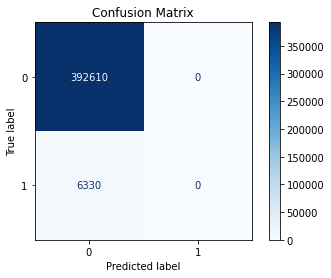

In [ ]:
#Plotting the Confusion matrix 

title = "Confusion Matrix"

disp = ConfusionMatrixDisplay.from_estimator(
        lr_clf,
        X_test,
        y_test,
        cmap=plt.cm.Blues
    )
disp.ax_.set_title(title)

plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99    392610
           1       0.00      0.00      0.00      6330

    accuracy                           0.98    398940
   macro avg       0.49      0.50      0.50    398940
weighted avg       0.97      0.98      0.98    398940



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

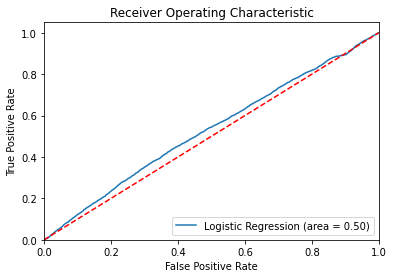

In [ ]:
lr_roc_auc = roc_auc_score(y_test, lr_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#AUC=0.5

In [ ]:
comments['y'].value_counts()

0    1570612
1      25148
Name: y, dtype: int64

In [ ]:
#Check the distribution (the dataset is highly unbalanced)
comments['y'].value_counts()/comments.shape[0]

0    0.984241
1    0.015759
Name: y, dtype: float64

In [ ]:
#Define weigths
w = {0:2, 1:98}

In [ ]:
#Train another logistic regression classifier with appropriate weigths in order to counteract the unbalanced distribution of the target variable
lr_clf2 = LogisticRegression(random_state=40, class_weight=w)
lr_clf2.fit(X_train, y_train)

LogisticRegression(class_weight={0: 2, 1: 98}, random_state=40)

In [ ]:
#Make a prediction for the whole dataset
pred2 = lr_clf2.predict(X)
print(len(pred2))
print(len(X))

1595760
1595760


In [ ]:
#Make a prediction only for the test set
y_pred2 = lr_clf2.predict(X_test)
print('Accuracy of the logistic regression classifier on test set: {:.2f}'.format(lr_clf.score(X_test, y_test))) #0.98

Accuracy of the logistic regression classifier on test set: 0.98


In [ ]:
print(np.count_nonzero(y_pred2 == 0))
print(np.count_nonzero(y_pred2 == 1))

393372
5568


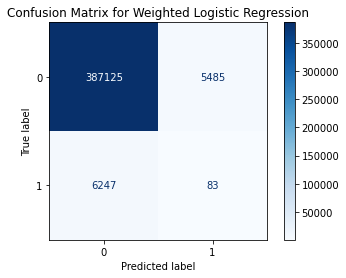

In [ ]:
title = "Confusion Matrix for Weighted Logistic Regression"

disp = ConfusionMatrixDisplay.from_estimator(
        lr_clf2,
        X_test,
        y_test,
        cmap=plt.cm.Blues
    )
disp.ax_.set_title(title)

plt.show()

In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    392610
           1       0.01      0.01      0.01      6330

    accuracy                           0.97    398940
   macro avg       0.50      0.50      0.50    398940
weighted avg       0.97      0.97      0.97    398940



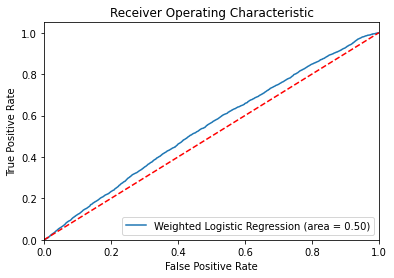

In [ ]:
lr_roc_auc2 = roc_auc_score(y_test, lr_clf2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr_clf2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Weighted Logistic Regression (area = %0.2f)' % lr_roc_auc2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#AUC=0.5

###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier(random_state=40, class_weight=w) #weighted random forest
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 2, 1: 98}, random_state=40)

In [ ]:
#Make a prediction for the whole dataset
pred_rf = rf_clf.predict(X)
print(len(pred_rf))
print(len(X))

1595760
1595760


In [ ]:
#Make a prediction only for the test set
y_pred_rf = rf_clf.predict(X_test)
print('Accuracy of the random forest classifier on test set: {:.2f}'.format(rf_clf.score(X_test, y_test))) #0.75

Accuracy of the random forest classifier on test set: 0.75


In [ ]:
print(np.count_nonzero(y_pred_rf == 0))
print(np.count_nonzero(y_pred_rf == 1))

300720
98220


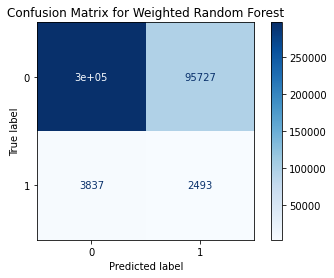

In [ ]:
title = "Confusion Matrix for Weighted Random Forest"

disp = ConfusionMatrixDisplay.from_estimator(
        rf_clf,
        X_test,
        y_test,
        cmap=plt.cm.Blues
    )
disp.ax_.set_title(title)

plt.show()

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86    392610
           1       0.03      0.39      0.05      6330

    accuracy                           0.75    398940
   macro avg       0.51      0.58      0.45    398940
weighted avg       0.97      0.75      0.84    398940



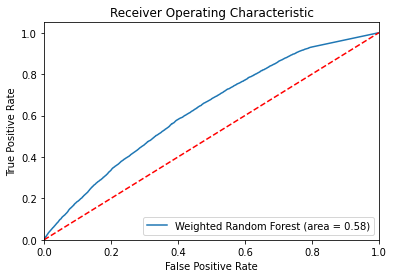

In [ ]:
rf_roc_auc = roc_auc_score(y_test, rf_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Weighted Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#AUC=0.58

In [ ]:
#Add a new column with the predictions of the best model obtained so far (weighted random forest model)
comments['predicted'] = pred_rf
comments.head()

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,editorsSelection,inReplyTo,newDesk,parentID,parentUserDisplayName,permID,picURL,printPage,recommendations,recommendedFlag,replyCount,reportAbuseFlag,sectionName,sharing,status,timespeople,trusted,updateDate,userDisplayName,userID,userLocation,userTitle,userURL,typeOfMaterial,y,predicted
0,1520043821,5a974697410cf7000162e8a4,1207.0,If the choice is between mining for bitcoin - ...,26188943.0,26188943.0,<br/>,comment,1.520029e+09,1.0,0,0.0,Business,0.0,NaN,26188943,https://s3.amazonaws.com/pimage.timespeople.ny...,1.0,10.0,NaN,0.0,NaN,Economy,1,approved,1.0,0.0,1520043821,Steve,46903103.0,Florida,NaN,NaN,News,0,0
1,1520043790,5a974697410cf7000162e8a4,1207.0,"<br/>To me, Bitcoin (et al) appears to be an e...",26189292.0,26189292.0,<br/>,comment,1.520031e+09,1.0,0,0.0,Business,0.0,NaN,26189292,https://graphics8.nytimes.com/images/apps/time...,1.0,8.0,NaN,0.0,NaN,Economy,0,approved,1.0,0.0,1520043790,MyOpinion,82778.0,NYC,NaN,NaN,News,0,1
2,1520043789,5a974697410cf7000162e8a4,1207.0,Bitcoin is a pyramid scheme backed by nothing ...,26189645.0,26189645.0,<br/>,comment,1.520033e+09,1.0,0,0.0,Business,0.0,NaN,26189645,https://graphics8.nytimes.com/images/apps/time...,1.0,13.0,NaN,0.0,NaN,Economy,0,approved,1.0,0.0,1520043789,Bert Gold,3013548.0,"Frederick, Maryland",NaN,NaN,News,0,1
3,1520043788,5a974697410cf7000162e8a4,1207.0,What does it cost in energy to dig up and refi...,26189102.0,26189102.0,<br/>,comment,1.520030e+09,1.0,0,0.0,Business,0.0,NaN,26189102,https://graphics8.nytimes.com/images/apps/time...,1.0,2.0,NaN,0.0,NaN,Economy,0,approved,1.0,0.0,1520043788,James Demers,70245222.0,Brooklyn,NaN,NaN,News,0,1
4,1520043787,5a974697410cf7000162e8a4,1207.0,You forgot to mention stock buybacks.,26189683.0,26189683.0,<br/>,comment,1.520033e+09,1.0,0,0.0,Business,0.0,NaN,26189683,https://graphics8.nytimes.com/images/apps/time...,1.0,5.0,NaN,0.0,NaN,Economy,0,approved,1.0,0.0,1520043787,Bill,66424344.0,California,NaN,NaN,News,0,1


In [ ]:
comments['predicted'].value_counts()

0    1204281
1     391479
Name: predicted, dtype: int64

In [ ]:
comments['y'].value_counts()

0    1570612
1      25148
Name: y, dtype: int64

In [ ]:
success_comments = comments[comments.predicted != 0]

In [ ]:
success_comments.shape

(391479, 36)

In [ ]:
#Most controversial topics
print(success_comments['newDesk'].nunique()) 
print(success_comments['newDesk'].unique())

42
['Business' 'Editorial' 'Foreign' 'National' 'OpEd' 'Metro' 'Culture'
 'Science' 'Styles' 'Washington' 'Travel' 'Express' 'Games' 'Sports'
 'Investigative' 'SundayBusiness' 'Photo' 'Obits' 'NYTNow' 'Upshot'
 'Insider' 'NewsDesk' 'Dining' 'Politics' 'Learning' 'Well' 'RealEstate'
 'Magazine' 'Smarter Living' 'Metropolitan' 'Weekend' 'Arts&Leisure'
 'EdLife' 'Unknown' 'SpecialSections' 'Video' 'Letters' 'Podcasts'
 'BookReview' 'Climate' 'Society' 'TStyle']


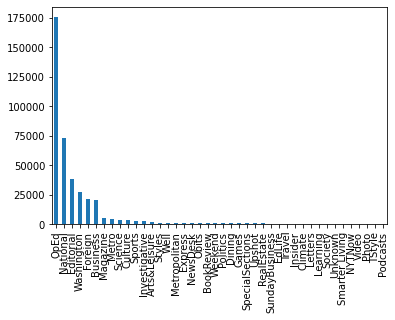

In [ ]:
success_comments['newDesk'].value_counts().plot(kind='bar')